# Upload Dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving allHousesUnfiltered.csv to allHousesUnfiltered.csv


In [ ]:
import pandas as pd
import io

house_df = pd.read_csv(io.StringIO(uploaded['allHouses.csv'].decode('utf-8')))
# house_df_unfiltered = pd.read_csv(io.StringIO(uploaded['allHousesUnfiltered.csv'].decode('utf-8')))

print(house_df.columns.to_list())

In [25]:
import pandas as pd

# file_path = '/content/allHouses.csv'
file_path_Unfiltered = r'C:\Users\nicho\OneDrive - The University of Western Ontario\Ecolux\Databases\REFIT\Combined Normalized\allHousesUnfiltered.csv'

# Read the CSV file into a DataFrame
# house_df = pd.read_csv(file_path)
predict_missing_data_house_df = pd.read_csv(file_path_Unfiltered)
train_no_missing_data_house_df = predict_missing_data_house_df[predict_missing_data_house_df['Total'].notna()]
missing_data_rows = predict_missing_data_house_df[predict_missing_data_house_df['Total'].isnull()]


# print(house_df.columns.to_list())
print(predict_missing_data_house_df.columns.to_list())
print(train_no_missing_data_house_df.columns.to_list())




['HouseNum', 'TimeSin', 'TimeCos', 'DayNumSin', 'DayNumCos', 'MonthSin', 'MonthCos', 'RealTemp', 'ApparTemp', 'Humid', 'Wmo_0-9', 'Wmo_10-19', 'Wmo_20-29', 'Wmo_30-39', 'Wmo_40-49', 'Wmo_50-59', 'Wmo_60-69', 'Wmo_70-79', 'Wmo_80-89', 'Wmo_90-99', 'YearBuilt__under_1899', 'YearBuilt_1900-1909', 'YearBuilt_1910-1919', 'YearBuilt_1920-1929', 'YearBuilt_1930-1939', 'YearBuilt_1940-1949', 'YearBuilt_1950-1959', 'YearBuilt_1960-1969', 'YearBuilt_1970-1979', 'YearBuilt_1980-1989', 'YearBuilt_1990-1999', 'YearBuilt_2000-2009', 'YearBuilt_2010-2019', 'YearBuilt_2020-2029', 'Type_BUNGALOW', 'Type_COTTAGE', 'Type_DETACHED', 'Type_END OF TERRACE', 'Type_FLAT', 'Type_SEMI-DETACHED', 'Type_MID-TERRACE', 'NumRooms', 'NumOccupants', 'Total', 'AlwaysOn', 'Intermit', 'HVAC']
['HouseNum', 'TimeSin', 'TimeCos', 'DayNumSin', 'DayNumCos', 'MonthSin', 'MonthCos', 'RealTemp', 'ApparTemp', 'Humid', 'Wmo_0-9', 'Wmo_10-19', 'Wmo_20-29', 'Wmo_30-39', 'Wmo_40-49', 'Wmo_50-59', 'Wmo_60-69', 'Wmo_70-79', 'Wmo_80-89'

In [2]:
import pandas as pd
import io

# Read in the csv
houses_dataset = r'C:\Users\nicho\OneDrive - The University of Western Ontario\Ecolux\Databases\REFIT\Combined Normalized\allHousesUnfiltered.csv'
house_df = pd.read_csv(houses_dataset)


# Setting up model

In [19]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import ElasticNet
# from sklearn.multioutput import MultiOutputRegressor
# from sklearn.preprocessing import PowerTransformer
# import numpy as np
# import pandas as pd

# print("house_df---->>>>",house_df.columns.to_list())
# selected_features = ['AlwaysOn', 'Intermit', 'HVAC',]
# drop_columns_train = [ 'AlwaysOn', 'Intermit', 'HVAC', 'HouseNum', 'RealTemp', 'ApparTemp', 'Humid', 'Wmo_0-9', 'Wmo_10-19', 'Wmo_20-29', 'Wmo_30-39', 'Wmo_40-49', 'Wmo_50-59', 'Wmo_60-69', 'Wmo_70-79', 'Wmo_80-89', 'Wmo_90-99']
# drop_columns_train.extend(selected_features)

# X = house_df.drop(columns=drop_columns_train, axis=1)
# Y = house_df[selected_features] # Last 3 are ['AlwaysOn', 'Intermit', 'HVAC']
# # Assuming X is your feature matrix and Y is the target matrix with n columns
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# y_test_array = y_test.values

# # ######Uncomment the below code if you want to merge AlwaysOn and HVAC#########################
# # Y = house_df[['AlwaysOn', 'Intermit', 'HVAC']].copy()  # Last 3 columns
# # Y['Combined'] = Y['AlwaysOn'] + Y['HVAC']
# # Y.drop(columns=['AlwaysOn', 'HVAC'], inplace=True)
# # #########################################################################################

# print("X.head----->>>>>", X.columns.to_list())
# print("Y.head----->>>>>",Y.columns.to_list())



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PowerTransformer
import numpy as np
import pandas as pd

def inverse_yeo_johnson(y, lambda_):
    if lambda_ == 0:
        return np.exp(y) - 1
    else:
        if y >= 0:
            return (y * lambda_ + 1) ** (1 / lambda_) - 1
        else:
            return -((1 - y * (2 - lambda_)) ** (1 / (2 - lambda_)) - 1)


# must be passed in as a Dataframe
# total_energy_inverseYeoJohnson is the transformed values |
# total_energy_actual is the real values for energy
def calculate_total_inverse_yeo_johnson(total_df, lambda_value=-0.06419593996677918):
    if 'Total' in total_df.columns:
        total_energy_inverseYeoJohnson = pd.DataFrame(total_df['Total'])
        total_energy_actual = total_energy_inverseYeoJohnson.apply(lambda row: inverse_yeo_johnson(row['Total'], lambda_value), axis=1)
        total_energy_actual_df = pd.DataFrame(total_energy_actual, columns=['Total'])
        total_energy_actual_array = total_energy_actual.values.flatten()

        print("Original total values, [Total]:\n", total_energy_inverseYeoJohnson.sort_index().head(3))
        print("coverted total energy test data\n", total_energy_actual_df.sort_index().head(3))

        return total_energy_actual, total_energy_actual_df, total_energy_actual_array
    else:
        print("No 'Total' column found in the DataFrame.")
        return None, None, None




def convert_fractions_to_actuals(fractions, total_energy_actual_array, columns_to_apply=['AlwaysOn', 'Intermit', 'HVAC']):
    # Check if the required columns exist in fractions DataFrame
    if isinstance(fractions, pd.DataFrame):
        valid_columns = [col for col in columns_to_apply if col in fractions.columns]
    else:
        valid_columns = columns_to_apply
        print("valid_columns",valid_columns)

    # If the required columns exist, apply the conversion
    if valid_columns:
        fractions_array = fractions[valid_columns].values if isinstance(fractions, pd.DataFrame) else fractions
        fractions_actuals = fractions_array * total_energy_actual_array[:, np.newaxis]
        if isinstance(fractions, pd.DataFrame):
            fractions_actuals_df = pd.DataFrame(fractions_actuals, index=fractions.index, columns=valid_columns)
            print("Result: fractions_actuals_df\n", fractions_actuals_df.sort_index().head(3))
        else:
            print("Result: fractions_actuals\n", fractions_actuals[:3])
        return fractions_actuals, fractions_actuals_df if isinstance(fractions, pd.DataFrame) else None
    else:
        print("No valid columns found for conversion in ['AlwaysOn', 'Intermit', 'HVAC']")
        return None, None

# Example usage:
# y_test_actuals, y_test_actuals_df = convert_fractions_to_actuals(y_pred_gb, total_energy_actual_array)


# Performance Analytics

Definitions:<br>
**MSE**:<br>
-> Definition: MSE measures the average of
the squared differences between actual and predicted values. It is calculated by taking the average of the square of the errors (difference between actual and predicted values). <br>
-> Usage: MSE is useful for evaluating the variance of the model's errors. Lower MSE values indicate better model performance
<br>
**RMSE**:<br>
-> Definition: RMSE is the square root of the mean squared error. It measures the standard deviation of the residuals (errors).<br>
-> Usage: RMSE is more interpretable than MSE because it is in the same units as the target variable. It provides insight into how close the model's predictions are to the actual values.
<br>
**MAE**:<br>
-> Definition: MAE measures the average of the absolute differences between actual and predicted values. It is calculated by taking the mean of the absolute differences between actual and predicted values.<br>
-> Usage: MAE is useful for measuring the average magnitude of errors, without considering their direction. Lower MAE values indicate better model performance.
<br>
**MAPE**:<br>
-> Definition: MAPE measures the average of the absolute percentage differences between actual and predicted values. It expresses errors as percentages of actual values.<br>
-> Usage: MAPE provides insight into the relative size of errors. It is useful for comparing model performance across different scales.
<br>
**R^2**:<br>
-> Definition: R^2 measures the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1, where 1 indicates a perfect fit.<br>
-> Usage: R^2 provides a measure of how well the model explains the variability of the target variable. Higher values indicate better model performance.

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np



# #make sure you convert to the same values
def calculate_performance_metrics(y_test_actuals, y_pred_actuals_model, y_test_fracs=None, y_pred_fracs_model=None):
    # Calculate performance metrics
    metrics = {}



    metrics['mse'] = mean_squared_error(y_test_actuals, y_pred_actuals_model, multioutput='raw_values')
    metrics['rmse'] = np.sqrt(metrics['mse'])
    metrics['mae'] = mean_absolute_error(y_test_actuals, y_pred_actuals_model, multioutput='raw_values')
    metrics['mape'] = mean_absolute_percentage_error(y_test_actuals, y_pred_actuals_model, multioutput='raw_values')
    metrics['r2'] = r2_score(y_test_actuals, y_pred_actuals_model, multioutput='raw_values')

    # Calculate differences and absolute differences
    differences = y_pred_actuals_model - y_test_actuals
    absolute_differences = np.abs(differences)

    # Calculate additional metrics
    metrics['max_difference'] = np.max(differences, axis=0)
    metrics['mean_difference'] = np.mean(differences, axis=0)
    metrics['median_difference'] = np.median(differences, axis=0)
    metrics['mean_absolute_difference'] = np.mean(absolute_differences, axis=0)
    metrics['median_absolute_difference'] = np.median(absolute_differences, axis=0)


    if y_test_fracs is not None and y_pred_fracs_model is not None:
        # Now doing it in fractions
        absolute_differences_fracs = np.abs(y_test_fracs - y_pred_fracs_model)
        metrics['mean_absolute_difference_fracs'] = np.mean(absolute_differences_fracs, axis=0)
        metrics['max_absolute_difference_fracs'] = np.max(absolute_differences_fracs, axis=0)



    # Check if any of the predicted values are negative
    negative_values = y_pred_actuals_model < 0
    num_negative_values = np.sum(negative_values)
    if num_negative_values > 0:
        print(f"Warning!!: {num_negative_values} predicted values are negative")
    return metrics




# def calculate_performance_metrics(y_test_actuals, y_pred_actuals_model, y_test_fracs=None, y_pred_fracs_model=None):
#     # Calculate performance metrics
#     metrics = {}

#     # Flatten arrays if they are multi-dimensional
#     y_test_actuals_flat = y_test_actuals.values.flatten() if isinstance(y_test_actuals, pd.DataFrame) else np.asarray(y_test_actuals).flatten()
#     y_pred_actuals_model_flat = y_pred_actuals_model.values.flatten() if isinstance(y_pred_actuals_model, pd.DataFrame) else np.asarray(y_pred_actuals_model).flatten()

#     print("Shape of y_test_actuals_flat:", y_test_actuals_flat.shape)
#     print("Shape of y_pred_actuals_model_flat:", y_pred_actuals_model_flat.shape)

#     metrics['mse'] = mean_squared_error(y_test_actuals_flat, y_pred_actuals_model_flat)
#     metrics['rmse'] = np.sqrt(metrics['mse'])
#     metrics['mae'] = mean_absolute_error(y_test_actuals_flat, y_pred_actuals_model_flat)
#     metrics['mape'] = mean_absolute_percentage_error(y_test_actuals_flat, y_pred_actuals_model_flat)
#     metrics['r2'] = r2_score(y_test_actuals_flat, y_pred_actuals_model_flat)

#     # Calculate differences and absolute differences
#     differences = y_pred_actuals_model_flat - y_test_actuals_flat
#     absolute_differences = np.abs(differences)

#     # Calculate additional metrics
#     metrics['max_difference'] = np.max(differences)
#     metrics['mean_difference'] = np.mean(differences)
#     metrics['median_difference'] = np.median(differences)
#     metrics['mean_absolute_difference'] = np.mean(absolute_differences)
#     metrics['median_absolute_difference'] = np.median(absolute_differences)

#     if y_test_fracs is not None and y_pred_fracs_model is not None:
#         # Now doing it in fractions
#         absolute_differences_fracs = np.abs(y_test_fracs - y_pred_fracs_model)
#         metrics['mean_absolute_difference_fracs'] = np.mean(absolute_differences_fracs)
#         metrics['max_absolute_difference_fracs'] = np.max(absolute_differences_fracs)

#     # Check if any of the predicted values are negative
#     negative_values = y_pred_actuals_model_flat < 0
#     num_negative_values = np.sum(negative_values)
#     if num_negative_values > 0:
#         print(f"Warning!!: {num_negative_values} predicted values are negative")

#     return metrics


def print_performance_metrics(metrics):
    print("Y.head: ", Y.columns.to_list())
    print("MSE per output:", metrics['mse'])
    print("RMSE per output:", metrics['rmse'])
    print("MAE per output:", metrics['mae'])
    print("MAPE per output:", metrics['mape'])
    print("R^2 per output:", metrics['r2'])
    print("Maximum Difference:", metrics['max_difference'])
    print("Mean Difference:", metrics['mean_difference'])
    print("Median Difference:", metrics['median_difference'])
    print("Mean Absolute Difference:", metrics['mean_absolute_difference'])
    print("Median Absolute Difference:", metrics['median_absolute_difference'])

    if 'mean_absolute_difference_fracs' in metrics:
        print("Mean Absolute Difference in percentage(%): ", metrics['mean_absolute_difference_fracs'])
        print("Maximum Absolute Difference in percentage(%): ", metrics['max_absolute_difference_fracs'])


In [12]:
# feature importances for each output
def feature_importance(model):
  for i, estimator in enumerate(model.estimators_):
      print(f"Feature Importances for Output {y_train.columns[i]}:")
      feature_importances = estimator.feature_importances_
      feature_importances_list = [(X.columns[j], importance) for j, importance in enumerate(feature_importances)]
      feature_importances_list_sorted = sorted(feature_importances_list, key=lambda x: x[1], reverse=True)
      for feature, importance in feature_importances_list_sorted:
          print(f"{feature}: {importance}")
      print("___________________________________________________________________")

# Graphs

## Residuals against predicted values Graph

In [6]:
import matplotlib.pyplot as plt


def residual_vs_predicted_plot(y_test_actuals, y_pred_actuals_model):
    y_test_actuals_df = pd.DataFrame(y_test_actuals, columns=y_test.columns)
    y_pred_actuals_model_df = pd.DataFrame(y_pred_actuals_model, columns=y_test.columns)

    # Calculate residuals
    residuals = y_test_actuals_df - y_pred_actuals_model_df


    # Plot residuals against predicted values
    for column in residuals.columns:

        current_predicted_values = y_pred_actuals_model[:, residuals.columns.get_loc(column)]
        current_residuals = residuals[column]

        # Create a scatter plot of residuals vs. predicted values
        plt.figure(figsize=(8, 6))
        plt.scatter(current_predicted_values, current_residuals)
        plt.axhline(0, color='red', linestyle='--')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title(f'Residuals vs. Predicted Values (Linear Model) - {column}')
        plt.show()

## Histogram of residuals Graph

In [7]:
import matplotlib.pyplot as plt

def histogram_residuals(y_test_actuals, y_pred_actuals_model):
    y_test_actuals_df = pd.DataFrame(y_test_actuals, columns=y_test.columns)
    y_pred_actuals_model_df = pd.DataFrame(y_pred_actuals_model, columns=y_test.columns)

    # Calculate residuals
    residuals = y_test_actuals_df - y_pred_actuals_model_df

    # calculate range based on the data, ignoring the extreme x% of values
    # adjust this based on the range, just so we can see the results better
    lower_percentile = residuals.quantile(0.05)#0.00
    upper_percentile = residuals.quantile(0.95)

    # Plot histogram of residuals for each target variable
    for column in residuals.columns:
        current_residuals = residuals[column]

        range_min = lower_percentile[column]
        range_max = upper_percentile[column]

        # Create histogram of residuals
        plt.figure(figsize=(8, 6))
        plt.hist(current_residuals, bins=100, range=(range_min, range_max)) # range=(-1000, 1000)
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title(f'Histogram of Residuals - {column}')
        plt.show()

## Violin Plot

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def violin_plot_residuals(y_test_actuals, y_pred_actuals_model, top_percentage=5):
    y_test_actuals_df = pd.DataFrame(y_test_actuals, columns=y_test.columns)
    y_pred_actuals_model_df = pd.DataFrame(y_pred_actuals_model, columns=y_test.columns)

    residuals = y_test_actuals_df - y_pred_actuals_model_df
    absolute_residuals = residuals.abs()

    ####can also log the values so you dont have to get rid of the percentage
    # log_absolute_residuals = np.log1p(absolute_residuals)  # Apply log transformation

    #  top x% of absolute residuals for filtering out
    top_percentile = absolute_residuals.quantile(1 - top_percentage / 100)

    for column in absolute_residuals.columns:
        current_residuals = absolute_residuals[column]

        filtered_residuals = current_residuals[current_residuals <= top_percentile[column]]

        plt.figure(figsize=(8, 6))
        plt.violinplot(filtered_residuals, widths=0.7)
        plt.xlabel('Target Variable')
        plt.ylabel(f'Absolute Residuals (Excluding Top {top_percentage}%)')
        plt.title(f'Violin Plot of Absolute Residuals (Excluding Top {top_percentage}%) - {column}')
        plt.show()

## QQ Plot

In [9]:
# ###QQ plot###

import matplotlib.pyplot as plt
import scipy.stats as stats

def qq_plot(y_test_actuals, y_pred_actuals_model):
    # Calculate residuals
  residuals_linear = y_test_actuals - y_pred_actuals_model

  # QQ plot of residuals
  # Loop through each column in the residuals
  for column in residuals_linear.columns:
      # Extract the residuals for the current column
      current_residuals = residuals_linear[column]

      # Create a QQ plot for the current residuals
      plt.figure(figsize=(8, 6))
      stats.probplot(current_residuals, dist="norm", plot=plt)
      plt.title(f'QQ Plot of Residuals (Linear Model) - {column}')
      plt.show()


## Display all Graphs

In [10]:
def display_all_graphs(y_test_actuals, y_pred_actuals_model):
  residual_vs_predicted_plot(y_test_actuals, y_pred_actuals_model)
  histogram_residuals(y_test_actuals, y_pred_actuals_model)
  violin_plot_residuals(y_test_actuals, y_pred_actuals_model, top_percentage=5)
  qq_plot(y_test_actuals, y_pred_actuals_model)


In [11]:


# from sklearn.inspection import plot_partial_dependence
# import matplotlib.pyplot as plt

# # Features for which you want to plot PDPs
# features_to_plot = ['Feature1', 'Feature2', 'Feature3']  # Replace with the features you want to visualize

# # Output variables to visualize (index corresponds to the order of columns in y_train)
# target_indices = [0, 1, 2]  # HVAC_frac, AlwaysOn_frac, Intermit_frac

# # Create PDPs
# fig, ax = plt.subplots(figsize=(10, 8))
# plot_partial_dependence(
#     estimator=linear_model,
#     X=X_train,
#     features=features_to_plot,
#     target=target_indices,
#     ax=ax,
#     grid_resolution=50  # Number of points to use in grid
# )

# # Set titles for the plot
# ax[0].set_title('HVAC_frac')
# ax[1].set_title('AlwaysOn_frac')
# ax[2].set_title('Intermit_frac')

# # Show plot
# plt.show()


In [12]:
# ###SHAP (Shapley Additive Explanations)###

# import shap
# import matplotlib.pyplot as plt


# # Initialize the SHAP explainer for your model
# explainer = shap.Explainer(linear_model, X_train)

# # Compute SHAP values for the test set
# shap_values = explainer.shap_values(X_test)

# # Create SHAP summary plot for each target variable
# for i, target in enumerate(['HVAC', 'AlwaysOn', 'Intermit']):
#     # Use shap.summary_plot for each target variable
#     shap.summary_plot(shap_values[i], X_test, feature_names=selected_features, show=False)
#     plt.title(f'SHAP Summary Plot for {target}')
#     plt.show()

In [13]:
# import shap
# from xgboost import XGBRegressor
# ##https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Multioutput%20Regression%20SHAP.html
# ##https://towardsdatascience.com/explainable-ai-for-multiple-regression-2df70cfc9995
# # # Create an explainer object with the XGBoost model
# # explainer = shap.Explainer(gb_model)

# # # Calculate SHAP values
# # shap_values = explainer.shap_values(X_test)

# # # Visualize the SHAP values
# # shap.summary_plot(shap_values, X_test)

# explainer = shap.KernelExplainer(model=gb_model.predict, data=X.head(50), link="identity")

# # Set the index of the specific example to explain
# X_idx = 0

# shap_value_single = explainer.shap_values(X=X.iloc[X_idx : X_idx + 1, :], nsamples=100)

# X.iloc[X_idx : X_idx + 1, :]


In [14]:
# from sklearn.inspection import plot_partial_dependence

# def plot_partial_dependence(model, X, feature_names):
#     # Plot partial dependence for each feature
#     fig, axs = plot_partial_dependence(model, X, features=[i for i in range(len(feature_names))], feature_names=feature_names, grid_resolution=50)
#     fig.suptitle('Partial Dependence Plots')
#     plt.show()

# # Usage
# plot_partial_dependence(gb_model, X_test, X.columns)


In [15]:
############NOT SURE ABOUT THIS##################

from xgboost import XGBRegressor
import matplotlib.pyplot as plt


# Get feature importances from the trained XGBoost model
feature_importances_gb = gb_model.estimators_[0].get_booster().get_score(importance_type='weight')
print(feature_importances_gb)
# Initialize a dictionary to store feature importance percentages for each predictor
feature_importance_percentage_gb = {}

# Calculate total importance for each predictor
total_importance_gb = sum(feature_importances_gb.values())

# Calculate importance percentages for each feature in each predictor
for target_column in Y.columns:
    feature_importance_percentage_gb[target_column] = {}
    for feature, importance in feature_importances_gb.items():
        feature_importance_percentage_gb[target_column][feature] = (importance / total_importance_gb) * 100

print(feature_importance_percentage_gb)
# Create separate graphs for each predictor
for target_column, importance_dict in feature_importance_percentage_gb.items():
    # Convert dictionary to DataFrame for sorting
    importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Calculate importance percentages for display
    importance_df['Importance (%)'] = (importance_df['Importance'] / importance_df['Importance'].sum()) * 100

    # Plot feature importances for the current predictor
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    for index, value in enumerate(importance_df['Importance']):
        plt.text(value, index, f'{value:.2f}%', ha='left')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance for Predictor: {target_column} (XGBoost)')
    plt.show()

NameError: name 'gb_model' is not defined

In [ ]:
import matplotlib.pyplot as plt

feature_importances  = gb_model.estimators_[0].feature_importances_
print(feature_importances)


[0.06022225 0.04543082 0.01268391 0.00680095 0.01490394 0.02559882
 0.00913699 0.00711785 0.00807204 0.00539723 0.         0.
 0.         0.         0.01049488 0.00917203 0.00487436 0.
 0.         0.02512721 0.         0.         0.         0.
 0.02212516 0.         0.05642403 0.01276595 0.02882228 0.04179651
 0.04204712 0.01139974 0.         0.         0.         0.02189942
 0.         0.         0.39627457 0.02705124 0.         0.
 0.         0.         0.05626161 0.03809909]


# Linear Regression

In [ ]:
import pandas as pd

# Print the first five rows of y_train
print(y_train.head())

# Check for missing values in y_train
print(y_train.isnull().sum())

# Initialize and fit the model
linear_model = MultiOutputRegressor(ElasticNet(random_state=42, positive=True)).fit(X_train, y_train)

# Predicting the percentages
y_pred_fracs_linear = linear_model.predict(X_test)
print("y_pred_fracs_linear", y_pred_fracs_linear)


# Converting back to energy values
y_pred_actuals_linear = y_pred_fracs_linear * total_energy_inverseYeoJohnson_array
result_df = pd.DataFrame(y_pred_actuals_linear)
print("result: ",result_df.sort_index())
# performance analysis
metrics = calculate_performance_metrics(y_test_actuals, y_pred_actuals_linear)
print_performance_metrics(metrics)

        AlwaysOn  Intermit      HVAC
162687  0.080576  0.089216  0.830208
22801   0.190761  0.098911  0.710328
203564  0.396688  0.030601  0.572711
140524  0.000000  0.166675  0.833325
129027  0.126301  0.595352  0.278347
AlwaysOn    0
Intermit    0
HVAC        0
dtype: int64
y_pred_fracs_linear [[0.18243149 0.18373948 0.63382902]
 [0.18243149 0.18373948 0.63382902]
 [0.18243149 0.18373948 0.63382902]
 ...
 [0.18243149 0.18373948 0.63382902]
 [0.18243149 0.18373948 0.63382902]
 [0.18243149 0.18373948 0.63382902]]
result:                  0           1           2
0      113.542990  114.357066  394.486944
1      131.349581  132.291326  456.353094
2      122.128398  123.004030  424.315572
3      121.128127  121.996586  420.840287
4       15.342489   15.452491   53.305021
...           ...         ...         ...
44089   41.276402   41.572344  143.408253
44090   25.677233   25.861332   89.211435
44091  158.865358  160.004384  551.952258
44092  109.892353  110.680255  381.803392
44093   43

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the model
rf_model = MultiOutputRegressor(RandomForestRegressor(
    verbose=1,
    n_jobs=-1,
    n_estimators=100, #try 50 # was 100
    # max_depth = 10, #default is none
    # max_features=0.5, # Fewer features per split, less memory
    random_state=42
))

rf_model.fit(X_train, y_train)

# Predict the fractions
y_pred_fracs_rf = rf_model.predict(X_test)


# Converting back to energy values
y_pred_actuals_rf = y_pred_fracs_rf * total_energy_inverseYeoJohnson_array
# calculate metrics
metrics_rf = calculate_performance_metrics(y_test_actuals, y_pred_actuals_rf, y_test.values, y_pred_fracs_rf)
print_performance_metrics(metrics_rf)
feature_importance(rf_model)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


KeyboardInterrupt: 

In [ ]:
feature_importance(rf_model)


Feature Importances for Output AlwaysOn:
Total: 0.38008454980440326
HouseNum: 0.24006994099173046
ApparTemp: 0.051235383701939724
RealTemp: 0.042077171393807185
Humid: 0.0334604848232994
YearBuilt_1970-1979: 0.031811054564990233
TimeCos: 0.029837624328665043
TimeSin: 0.02641076536038575
YearBuilt_2010-2019: 0.02601604022191428
NumOccupants: 0.025400990995057156
MonthSin: 0.023774091280774023
MonthCos: 0.02298367685784954
DayNumSin: 0.016548958071928608
NumRooms: 0.013930940288731127
DayNumCos: 0.01024242060901279
YearBuilt__under_1899: 0.005822469358943641
YearBuilt_1990-1999: 0.004651917228854004
YearBuilt_1940-1949: 0.0043590728308699825
Type_DETACHED: 0.0024932558471122564
Wmo_50-59: 0.002110910191025118
Wmo_0-9: 0.0019719711277550738
Type_SEMI-DETACHED: 0.001955523440558492
YearBuilt_1960-1969: 0.0011722041377406477
Wmo_60-69: 0.0006421227715175748
YearBuilt_2000-2009: 0.0003306158424413664
Type_MID-TERRACE: 0.0003162856757780372
Wmo_70-79: 0.00016122979635477386
YearBuilt_1980-198

## Random Forest Regressor GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np

param_grid = {
    'estimator__n_estimators': [50, 100],
    'estimator__max_depth': [5, 10],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [1, 2],
    'estimator__max_features': ['sqrt'],
}

rf_model = MultiOutputRegressor(RandomForestRegressor(
    verbose=1,
    n_jobs=-1,
    n_estimators=100, #try 50 # was 100
    # max_depth = 10, #default is none
    # max_features=0.5, # Fewer features per split, less memory
    random_state=42
))


grid_search_rf = GridSearchCV(
    rf_model,
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
best_params_ = grid_search_rf.best_params_

print("best_params_ ----> Random Forest:", best_params_)
print("best_rf_model: ", best_rf_model)
y_pred_fracs_best_rf = best_rf_model.predict(X_test)


# Converting back to energy values
y_pred_actuals_rf = y_pred_fracs_rf * total_energy_inverseYeoJohnson_array
# calculate metrics
metrics_rf = calculate_performance_metrics(y_test_actuals, y_pred_actuals_rf, y_test.values, y_pred_fracs_rf)
print_performance_metrics(metrics_rf)
feature_importance(rf_model)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Paral

best_params_ ----> Random Forest: {'estimator__max_depth': 10, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 50}
best_rf_model:  MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_split=5,
                                                     n_estimators=50, n_jobs=-1,
                                                     random_state=42,
                                                     verbose=1))
Y.head:  ['AlwaysOn', 'Intermit', 'HVAC']
MSE per output: [ 1242.41646797 15396.27668929 15593.94347091]
RMSE per output: [ 35.24792856 124.08173391 124.87571209]
MAE per output: [17.47085687 53.0290313  56.23861582]
MAPE per output: [2.29000413e+15 6.50091093e+15 4.57373418e+12]
R^2 per output: [0.63798071 0.80127235 0.90585379]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


## Random Forest Regressor RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform

param_dist_rf = {
    'estimator__n_estimators': randint(50, 200),  # Number of trees in the forest
    'estimator__max_depth': [None, 10, 20, 30, 40],  # Maximum depth of trees
    'estimator__min_samples_split': randint(2, 10),  # Minimum samples for splitting a node
    'estimator__min_samples_leaf': randint(1, 4),  # Minimum samples per leaf
    # 'estimator__max_features': ['auto', 'sqrt', 'log2', 1.0],  # Number of features to consider for splitting
    'estimator__max_features': [1.0],  # Number of features to consider for splitting
}

# param_dist_rf = {
#     'estimator__n_estimators': [10,100,200],  # Number of trees in the forest
#     'estimator__max_depth': [3,5,10,None],  # Maximum depth of trees
#     'estimator__min_samples_split': [1,2,3],  # Minimum samples for splitting a node
#     'estimator__min_samples_leaf': [1,2,3],  # Minimum samples per leaf
#     # 'estimator__max_features': ['auto', 'sqrt', 'log2', 1.0],  # Number of features to consider for splitting
#     'estimator__max_features': [1,3,5,7],  # Number of features to consider for splitting
# }


# Initialize and fit the model
rf_model = MultiOutputRegressor(RandomForestRegressor(
    verbose=1,
    n_jobs=-1,
    n_estimators=100, #try 50 # was 100
    # max_depth = 10, #default is none
    # max_features=0.5, # Fewer features per split, less memory
    random_state=42
))
# rf_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))


randomized_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=10,  # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Metric to optimize
    # n_jobs=-1,
    cv=3,  # Number of cross-validation folds
    random_state=42  # For reproducibility
)

randomized_search_rf.fit(X_train, y_train)
print("best_params_ ---> RandomForestRegressor:", randomized_search_rf.best_params_)
print("best_rf_model---> RandomForestRegressor:", randomized_search_rf.best_estimator_)
best_rf_model = randomized_search_rf.best_estimator_
y_pred_fracs_best_rf = best_rf_model.predict(X_test)

# Converting back to energy values
y_pred_actuals_rf = y_pred_fracs_best_rf * total_energy_inverseYeoJohnson_array

# calculate metrics
metrics_rf = calculate_performance_metrics(y_test_actuals, y_pred_actuals_rf, y_test.values, y_pred_fracs_rf)
print_performance_metrics(metrics_rf)
feature_importance(rf_model)


# Gradient Boosting

In [ ]:
from xgboost import XGBRegressor

# Getting negative values. Look at changing the objective
gb_model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror',verbosity=1, n_estimators=100, random_state=42)).fit(X_train, y_train)

# Predict the fractions
y_pred_gb = gb_model.predict(X_test)

# TEMP fixing negatives
# y_pred_gb = np.maximum(y_pred_gb, 0)

total_energy_actual, total_energy_actual_df, total_energy_actual_array = calculate_total_inverse_yeo_johnson(X_test)
y_test_actuals, y_test_actuals_df = convert_fractions_to_actuals(y_test, total_energy_actual_array)
y_pred_gb_actuals, y_test_actuals_df = convert_fractions_to_actuals(y_pred_gb, total_energy_actual_array)
print("y_test_actuals",y_test_actuals)
print("y_pred_gb",y_pred_gb)
print("y_pred_gb_actuals",y_pred_gb_actuals)

calculate_performance_metrics(y_test_actuals, y_pred_gb_actuals)


Original total values, [Total]:
        Total
4   4.791903
6   3.172128
12  4.472217
coverted total energy test data
       Total
4   305.909
6    33.708
12  193.716
Result: 
     AlwaysOn  Intermit     HVAC
4     90.820    30.854  184.235
6      1.860     7.427   24.421
12    36.354     1.000  156.362
Result: 
 [[ 44.61497819 151.04050512 378.59636154]
 [ 77.38000699 223.35594012 443.52273884]
 [115.56213776 133.69214591 412.26277297]]
y_test_actuals [[ 58.713 175.314 388.36 ]
 [ 62.174 161.135 496.685]
 [145.402 162.104 361.942]
 ...
 [ 33.065   5.832 831.925]
 [ 80.992 108.85  412.534]
 [  4.275   0.879 230.586]]
y_pred_gb [[0.07168366 0.2426794  0.60829735]
 [0.10747313 0.31021917 0.61600894]
 [0.17262302 0.19970505 0.61582494]
 ...
 [0.01642008 0.16067392 0.7702935 ]
 [0.08931672 0.14827508 0.7429296 ]
 [0.09887329 0.07477449 0.852897  ]]
y_pred_gb_actuals [[ 44.61497819 151.04050512 378.59636154]
 [ 77.38000699 223.35594012 443.52273884]
 [115.56213776 133.69214591 412.26277297]


{'mse': array([ 1426.60707544, 18152.41753463, 18960.05656136]),
 'rmse': array([ 37.77045241, 134.73090787, 137.69552121]),
 'mae': array([19.37895636, 59.18979136, 62.84503664]),
 'mape': array([2.94833438e+15, 8.00051519e+15, 1.38723101e+13]),
 'r2': array([0.58431066, 0.76569743, 0.88553137]),
 'max_difference': array([ 849.62616732, 8097.20576449, 1814.12138398]),
 'mean_difference': array([ 0.1822286 ,  0.15104255, -0.53810232]),
 'median_difference': array([ 1.07607672,  1.38553172, -0.43515872]),
 'mean_absolute_difference': array([19.37895636, 59.18979136, 62.84503664]),
 'median_absolute_difference': array([12.08711861, 17.87882937, 23.73135681])}

## Gradient Boosting GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

# Define the parameter grid
param_grid_gb = {
    'estimator__n_estimators': [50, 100],
    'estimator__max_depth': [3, 6, 9],
    'estimator__learning_rate': [0.1, 0.01],
    'estimator__subsample': [0.8, 1.0],
}

# Initialize the MultiOutputRegressor with XGBRegressor
gb_model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror', random_state=42))

# Grid search
grid_search_gb = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid_gb,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search_gb.fit(X_train, y_train)

# Get the best model and its parameters
best_gb_model = grid_search_gb.best_estimator_
best_params_gb = grid_search_gb.best_params_

print("best_params_ ----> Gradient Boosting:", best_params_gb)
print("best_gb_model: ", best_gb_model)

# Predict using the best model
y_pred_fracs_gb = best_gb_model.predict(X_test)

# Converting back to energy values
y_pred_actuals_gb = y_pred_fracs_gb * total_energy_inverseYeoJohnson_array

# calculate metrics
metrics_gb = calculate_performance_metrics(y_test_actuals, y_pred_actuals_gb, y_test.values, y_pred_fracs_gb)
print_performance_metrics(metrics_gb)
feature_importance(gb_model)


## Gradient Boosting RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

# Define the parameter distributions
param_dist_gb = {
    'estimator__n_estimators': randint(50, 200),
    'estimator__max_depth': [3, 6, 9, None],
    'estimator__learning_rate': uniform(0.01, 0.1),
    'estimator__subsample': uniform(0.5, 0.5),
}

# Initialize the MultiOutputRegressor with XGBRegressor
gb_model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror', random_state=42))

# Randomized search
randomized_search_gb = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist_gb,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42
)
randomized_search_gb.fit(X_train, y_train)

# Get the best model and its parameters
best_gb_model = randomized_search_gb.best_estimator_
best_params_gb = randomized_search_gb.best_params_

print("best_params_ ----> Gradient Boosting:", best_params_gb)
print("best_gb_model: ", best_gb_model)

# Predict using the best model
y_pred_fracs_gb = best_gb_model.predict(X_test)

# Converting back to energy values
y_pred_actuals_gb = y_pred_fracs_gb * total_energy_inverseYeoJohnson_array

# calculate metrics
metrics_gb = calculate_performance_metrics(y_test_actuals, y_pred_actuals_gb, y_test.values, y_pred_fracs_gb)
print_performance_metrics(metrics_gb)
feature_importance(gb_model)


# Total->Hvac->intermit&alwaysOn

In [77]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from joblib import dump

selected_features = ['Total']
drop_columns_train = [ 'Total', 'AlwaysOn', 'Intermit', 'HVAC', 'HouseNum']
drop_columns_train.extend(selected_features)

X = train_no_missing_data_house_df.drop(columns=drop_columns_train, axis=1)
Y = train_no_missing_data_house_df[selected_features]


# gradient Boost
#model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror',verbosity=1, n_estimators=100, random_state=42))
#Random Forest
model = MultiOutputRegressor(RandomForestRegressor(verbose=1, n_jobs=-1, n_estimators=100,random_state=42))    # max_depth = 10, #default is none# max_features=0.5, # Fewer features per split, less memory
model.fit(X, Y)

print("X.head----->>>>>", X.columns.to_list())
print("Y.head----->>>>>",Y.columns.to_list())


####################Train, Test, And evaluate #######################
# print('Performance Evaluation')
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# model.fit(X_train, y_train)

# # Making a prediction
# y_pred = model.predict(X_test)
# y_pred_df = pd.DataFrame(y_pred, index=X_test.index, columns=Y.columns)

# # Actual values
# y_pred_actuals, a, b = calculate_total_inverse_yeo_johnson(pd.DataFrame(y_pred_df))
# ytest_actuals, , _ = calculate_total_inverse_yeo_johnson(pd.DataFrame(y_test))

# # Finding metrics
# metrics = calculate_performance_metrics(y_test_actuals.values, y_pred_actuals.values)
# print_performance_metrics(metrics)
# print()
############################################################################


#predicting the values and filling in
print('Filling Rows')
indices_to_print = [693, 694, 697, 418]
totals_houses_df = predict_missing_data_house_df.copy()
print(totals_houses_df.loc[indices_to_print, ['Total', 'AlwaysOn','Intermit','HVAC']])
X_missing = missing_data_rows.drop(columns=drop_columns_train, axis=1)
predicted_values = model.predict(X_missing).flatten()
totals_houses_df.loc[missing_data_rows.index, 'Total'] = predicted_values
missing_data_rows.loc[missing_data_rows.index, 'Total'] = predicted_values
print(totals_houses_df.loc[indices_to_print, ['Total', 'AlwaysOn','Intermit','HVAC']])

# Saving the model
model_path = r'C:\Users\nicho\OneDrive - The University of Western Ontario\Ecolux\Borealis AI\Models\TotalPrediction.joblib'
dump(model, model_path)
print('Saved model')


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


X.head----->>>>> ['TimeSin', 'TimeCos', 'DayNumSin', 'DayNumCos', 'MonthSin', 'MonthCos', 'RealTemp', 'ApparTemp', 'Humid', 'Wmo_0-9', 'Wmo_10-19', 'Wmo_20-29', 'Wmo_30-39', 'Wmo_40-49', 'Wmo_50-59', 'Wmo_60-69', 'Wmo_70-79', 'Wmo_80-89', 'Wmo_90-99', 'YearBuilt__under_1899', 'YearBuilt_1900-1909', 'YearBuilt_1910-1919', 'YearBuilt_1920-1929', 'YearBuilt_1930-1939', 'YearBuilt_1940-1949', 'YearBuilt_1950-1959', 'YearBuilt_1960-1969', 'YearBuilt_1970-1979', 'YearBuilt_1980-1989', 'YearBuilt_1990-1999', 'YearBuilt_2000-2009', 'YearBuilt_2010-2019', 'YearBuilt_2020-2029', 'Type_BUNGALOW', 'Type_COTTAGE', 'Type_DETACHED', 'Type_END OF TERRACE', 'Type_FLAT', 'Type_SEMI-DETACHED', 'Type_MID-TERRACE', 'NumRooms', 'NumOccupants']
Y.head----->>>>> ['Total']
Filling Rows
        Total  AlwaysOn  Intermit      HVAC
693  3.497579  0.053732  0.001126  0.945142
694       NaN       NaN       NaN       NaN
697       NaN       NaN       NaN       NaN
418       NaN       NaN       NaN       NaN


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
C:\Users\nicho\anaconda3\envs\Ecolux\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\nicho\AppData\Local\Temp\ipykernel_28836\992165630.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data_rows.loc[missing_data_rows.index, 'Total'] = predicted_values


        Total  AlwaysOn  Intermit      HVAC
693  3.497579  0.053732  0.001126  0.945142
694  5.365264       NaN       NaN       NaN
697  5.484461       NaN       NaN       NaN
418  4.525870       NaN       NaN       NaN
Saved model


In [78]:
import numpy as np
import pandas as pd

print("totals_houses_df---->>>>",totals_houses_df.columns.to_list())
selected_features = ['HVAC']
drop_columns_train = [ 'AlwaysOn', 'Intermit', 'HVAC', 'HouseNum']
drop_columns_train.extend(selected_features)

X = train_no_missing_data_house_df.drop(columns=drop_columns_train, axis=1)
Y = train_no_missing_data_house_df[selected_features] # Last 3 are ['AlwaysOn', 'Intermit', 'HVAC']

# gradient Boost
#model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror',verbosity=1, n_estimators=100, random_state=42))
#Random Forest
model = MultiOutputRegressor(RandomForestRegressor(verbose=1, n_jobs=-1, n_estimators=100,random_state=42))    # max_depth = 10, #default is none# max_features=0.5, # Fewer features per split, less memory
model.fit(X, Y)

print("X.head----->>>>>", X.columns.to_list())
print("Y.head----->>>>>",Y.columns.to_list())



####################Train, Test, And evaluate #######################
# print('Performance Evaluation')
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# model.fit(X_train, y_train)

# # Making a prediction
# y_pred = model.predict(X_test)
# y_pred_df = pd.DataFrame(y_pred, index=X_test.index, columns=Y.columns)

# # Converting to actuals
# x_total_actuals, a, x_total_actuals_array = calculate_total_inverse_yeo_johnson(pd.DataFrame(X_test))
# x_total_actuals_array_reshaped = x_total_actuals_array.reshape(-1, 1)
# y_pred_actuals = y_pred * x_total_actuals_array_reshaped
# y_test_actuals = y_test * x_total_actuals_array_reshaped
# y_test_actuals_reshaped = y_test_actuals.values.reshape(-1, 1)

# metrics = calculate_performance_metrics(y_test_actuals_reshaped, y_pred_actuals)
# print_performance_metrics(metrics)
############################################################################



# # predicting the values and filling in
indices_to_print = [693, 694, 697, 418]
HVAC_houses_df = totals_houses_df.copy()
print(HVAC_houses_df.loc[indices_to_print, ['Total', 'AlwaysOn','Intermit','HVAC']])
# missing_data_rows = predict_missing_data_house_df[predict_missing_data_house_df['Total'] == 0]
X_missing = missing_data_rows.drop(columns=drop_columns_train, axis=1)
predicted_values = model.predict(X_missing).flatten()
HVAC_houses_df.loc[missing_data_rows.index, 'HVAC'] = predicted_values
missing_data_rows.loc[missing_data_rows.index, 'HVAC'] = predicted_values
print(HVAC_houses_df.loc[indices_to_print, ['Total', 'AlwaysOn','Intermit','HVAC']])

# Saving the model
model_path = r'C:\Users\nicho\OneDrive - The University of Western Ontario\Ecolux\Borealis AI\Models\HVACPrediction.joblib'
dump(model, model_path)
print('Saved model')

totals_houses_df---->>>> ['HouseNum', 'TimeSin', 'TimeCos', 'DayNumSin', 'DayNumCos', 'MonthSin', 'MonthCos', 'RealTemp', 'ApparTemp', 'Humid', 'Wmo_0-9', 'Wmo_10-19', 'Wmo_20-29', 'Wmo_30-39', 'Wmo_40-49', 'Wmo_50-59', 'Wmo_60-69', 'Wmo_70-79', 'Wmo_80-89', 'Wmo_90-99', 'YearBuilt__under_1899', 'YearBuilt_1900-1909', 'YearBuilt_1910-1919', 'YearBuilt_1920-1929', 'YearBuilt_1930-1939', 'YearBuilt_1940-1949', 'YearBuilt_1950-1959', 'YearBuilt_1960-1969', 'YearBuilt_1970-1979', 'YearBuilt_1980-1989', 'YearBuilt_1990-1999', 'YearBuilt_2000-2009', 'YearBuilt_2010-2019', 'YearBuilt_2020-2029', 'Type_BUNGALOW', 'Type_COTTAGE', 'Type_DETACHED', 'Type_END OF TERRACE', 'Type_FLAT', 'Type_SEMI-DETACHED', 'Type_MID-TERRACE', 'NumRooms', 'NumOccupants', 'Total', 'AlwaysOn', 'Intermit', 'HVAC']


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   46.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


X.head----->>>>> ['TimeSin', 'TimeCos', 'DayNumSin', 'DayNumCos', 'MonthSin', 'MonthCos', 'RealTemp', 'ApparTemp', 'Humid', 'Wmo_0-9', 'Wmo_10-19', 'Wmo_20-29', 'Wmo_30-39', 'Wmo_40-49', 'Wmo_50-59', 'Wmo_60-69', 'Wmo_70-79', 'Wmo_80-89', 'Wmo_90-99', 'YearBuilt__under_1899', 'YearBuilt_1900-1909', 'YearBuilt_1910-1919', 'YearBuilt_1920-1929', 'YearBuilt_1930-1939', 'YearBuilt_1940-1949', 'YearBuilt_1950-1959', 'YearBuilt_1960-1969', 'YearBuilt_1970-1979', 'YearBuilt_1980-1989', 'YearBuilt_1990-1999', 'YearBuilt_2000-2009', 'YearBuilt_2010-2019', 'YearBuilt_2020-2029', 'Type_BUNGALOW', 'Type_COTTAGE', 'Type_DETACHED', 'Type_END OF TERRACE', 'Type_FLAT', 'Type_SEMI-DETACHED', 'Type_MID-TERRACE', 'NumRooms', 'NumOccupants', 'Total']
Y.head----->>>>> ['HVAC']
        Total  AlwaysOn  Intermit      HVAC
693  3.497579  0.053732  0.001126  0.945142
694  5.365264       NaN       NaN       NaN
697  5.484461       NaN       NaN       NaN
418  4.525870       NaN       NaN       NaN


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
C:\Users\nicho\anaconda3\envs\Ecolux\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\nicho\AppData\Local\Temp\ipykernel_28836\220147965.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data_rows.loc[missing_data_rows.index, 'HVAC'] = predicted_values


        Total  AlwaysOn  Intermit      HVAC
693  3.497579  0.053732  0.001126  0.945142
694  5.365264       NaN       NaN  0.888931
697  5.484461       NaN       NaN  0.886179
418  4.525870       NaN       NaN  0.663079
Saved model


In [79]:
import numpy as np
import pandas as pd

print("HVAC_houses_df---->>>>",HVAC_houses_df.columns.to_list())
selected_features = ['Intermit']
drop_columns_train = [ 'AlwaysOn', 'Intermit', 'HouseNum', 'RealTemp', 'ApparTemp', 'Humid'] # , 'Wmo_0-9', 'Wmo_10-19', 'Wmo_20-29', 'Wmo_30-39', 'Wmo_40-49', 'Wmo_50-59', 'Wmo_60-69', 'Wmo_70-79', 'Wmo_80-89', 'Wmo_90-99'
drop_columns_train.extend(selected_features)

X = train_no_missing_data_house_df.drop(columns=drop_columns_train, axis=1)
Y = train_no_missing_data_house_df[selected_features] # Last 3 are ['AlwaysOn', 'Intermit', 'HVAC']

# gradient Boost
#model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror',verbosity=1, n_estimators=100, random_state=42))
#Random Forest
model = MultiOutputRegressor(RandomForestRegressor(verbose=1, n_jobs=-1, n_estimators=100,random_state=42))    # max_depth = 10, #default is none# max_features=0.5, # Fewer features per split, less memory
model.fit(X, Y)

print("X.head----->>>>>", X.columns.to_list())
print("Y.head----->>>>>",Y.columns.to_list())


####################Train, Test, And evaluate #######################
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Making the predictions
y_pred = model.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, index=X_test.index, columns=Y.columns)

# Converting to actuals
x_total_actuals, a, x_total_actuals_array = calculate_total_inverse_yeo_johnson(pd.DataFrame(X_test))
x_total_actuals_array_reshaped = x_total_actuals_array.reshape(-1, 1)
y_pred_actuals = y_pred * x_total_actuals_array_reshaped
y_test_actuals = y_test * x_total_actuals_array_reshaped
y_test_actuals_reshaped = y_test_actuals.values.reshape(-1, 1)

# Calculating metrics
metrics = calculate_performance_metrics(y_test_actuals_reshaped, y_pred_actuals)
print_performance_metrics(metrics)
print(feature_importance(model))
############################################################################

# predicting the values and filling in
indices_to_print = [693, 694, 697, 418]
Intermit_houses_df = HVAC_houses_df.copy()
print(Intermit_houses_df.loc[indices_to_print, ['Total', 'AlwaysOn','Intermit','HVAC']])
print(Intermit_houses_df.head(3))
# missing_data_rows = predict_missing_data_house_df[predict_missing_data_house_df['Total'] == 0]
X_missing = missing_data_rows.drop(columns=drop_columns_train, axis=1)
predicted_values = model.predict(X_missing).flatten()
Intermit_houses_df.loc[missing_data_rows.index, 'Intermit'] = predicted_values
missing_data_rows.loc[missing_data_rows.index, 'HVAC'] = predicted_values
print(HVAC_houses_df.loc[indices_to_print, ['Total', 'AlwaysOn','Intermit','HVAC']])

# Saving the model
model_path = r'C:\Users\nicho\OneDrive - The University of Western Ontario\Ecolux\Borealis AI\Models\IntermitPrediction.joblib'
dump(model, model_path)
print('Saved model')

HVAC_houses_df---->>>> ['HouseNum', 'TimeSin', 'TimeCos', 'DayNumSin', 'DayNumCos', 'MonthSin', 'MonthCos', 'RealTemp', 'ApparTemp', 'Humid', 'Wmo_0-9', 'Wmo_10-19', 'Wmo_20-29', 'Wmo_30-39', 'Wmo_40-49', 'Wmo_50-59', 'Wmo_60-69', 'Wmo_70-79', 'Wmo_80-89', 'Wmo_90-99', 'YearBuilt__under_1899', 'YearBuilt_1900-1909', 'YearBuilt_1910-1919', 'YearBuilt_1920-1929', 'YearBuilt_1930-1939', 'YearBuilt_1940-1949', 'YearBuilt_1950-1959', 'YearBuilt_1960-1969', 'YearBuilt_1970-1979', 'YearBuilt_1980-1989', 'YearBuilt_1990-1999', 'YearBuilt_2000-2009', 'YearBuilt_2010-2019', 'YearBuilt_2020-2029', 'Type_BUNGALOW', 'Type_COTTAGE', 'Type_DETACHED', 'Type_END OF TERRACE', 'Type_FLAT', 'Type_SEMI-DETACHED', 'Type_MID-TERRACE', 'NumRooms', 'NumOccupants', 'Total', 'AlwaysOn', 'Intermit', 'HVAC']
Intermit    0
dtype: int64


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   45.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


X.head----->>>>> ['TimeSin', 'TimeCos', 'DayNumSin', 'DayNumCos', 'MonthSin', 'MonthCos', 'Wmo_0-9', 'Wmo_10-19', 'Wmo_20-29', 'Wmo_30-39', 'Wmo_40-49', 'Wmo_50-59', 'Wmo_60-69', 'Wmo_70-79', 'Wmo_80-89', 'Wmo_90-99', 'YearBuilt__under_1899', 'YearBuilt_1900-1909', 'YearBuilt_1910-1919', 'YearBuilt_1920-1929', 'YearBuilt_1930-1939', 'YearBuilt_1940-1949', 'YearBuilt_1950-1959', 'YearBuilt_1960-1969', 'YearBuilt_1970-1979', 'YearBuilt_1980-1989', 'YearBuilt_1990-1999', 'YearBuilt_2000-2009', 'YearBuilt_2010-2019', 'YearBuilt_2020-2029', 'Type_BUNGALOW', 'Type_COTTAGE', 'Type_DETACHED', 'Type_END OF TERRACE', 'Type_FLAT', 'Type_SEMI-DETACHED', 'Type_MID-TERRACE', 'NumRooms', 'NumOccupants', 'Total', 'HVAC']
Y.head----->>>>> ['Intermit']


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   43.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.7s finished


Original total values, [Total]:
        Total
4   4.791903
6   3.172128
12  4.472217
coverted total energy test data
       Total
4   305.909
6    33.708
12  193.716
Y.head:  ['Intermit']
MSE per output: [1127.8953638]
RMSE per output: [33.58415346]
MAE per output: [13.59601721]
MAPE per output: [1.24854362e+15]
R^2 per output: [0.98544168]
Maximum Difference: [1025.65002619]
Mean Difference: [-0.45557809]
Median Difference: [0.15198652]
Mean Absolute Difference: [13.59601721]
Median Absolute Difference: [5.18631532]
Feature Importances for Output Intermit:
HVAC: 0.5047220726097289
Total: 0.31775177260307946
NumOccupants: 0.035496259566622175
YearBuilt_2010-2019: 0.020943219248642925
YearBuilt_1970-1979: 0.014322932930807606
NumRooms: 0.012665828659436768
YearBuilt_2000-2009: 0.012150004276871452
MonthSin: 0.011771010779648079
TimeSin: 0.009641949609273674
TimeCos: 0.009550788627984879
MonthCos: 0.008839219213745735
YearBuilt_1940-1949: 0.00798238929090455
Type_DETACHED: 0.007355809186

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
C:\Users\nicho\anaconda3\envs\Ecolux\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\nicho\AppData\Local\Temp\ipykernel_28836\1015366444.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data_rows.loc[missing_data_rows.index, 'HVAC'] = predicted_values


        Total  AlwaysOn  Intermit      HVAC
693  3.497579  0.053732  0.001126  0.945142
694  5.365264       NaN       NaN  0.888931
697  5.484461       NaN       NaN  0.886179
418  4.525870       NaN       NaN  0.663079
Saved model


In [80]:
Intermit_houses_df.loc[missing_data_rows.index, 'AlwaysOn'] = 1.0 - Intermit_houses_df.loc[missing_data_rows.index, 'Intermit'] - Intermit_houses_df.loc[missing_data_rows.index, 'HVAC']
print(Intermit_houses_df.head(3))
print(Intermit_houses_df.loc[indices_to_print, ['Total', 'AlwaysOn','Intermit','HVAC']])

   HouseNum   TimeSin   TimeCos  DayNumSin  DayNumCos  MonthSin  MonthCos  \
0       1.0 -0.500000 -0.866025   0.974928  -0.222521 -0.866025       0.5   
1       1.0 -0.707107 -0.707107   0.974928  -0.222521 -0.866025       0.5   
2       1.0 -0.866025 -0.500000   0.974928  -0.222521 -0.866025       0.5   

   RealTemp  ApparTemp  Humid  ...  Type_END OF TERRACE  Type_FLAT  \
0  0.792136   0.392199   0.59  ...                  0.0        0.0   
1  0.607125   0.255182   0.65  ...                  0.0        0.0   
2  0.311106   0.011597   0.70  ...                  0.0        0.0   

   Type_SEMI-DETACHED  Type_MID-TERRACE  NumRooms  NumOccupants     Total  \
0                 0.0               0.0       0.4           0.2  5.489313   
1                 0.0               0.0       0.4           0.2  5.301124   
2                 0.0               0.0       0.4           0.2  5.240370   

   AlwaysOn  Intermit      HVAC  
0  0.041201  0.001036  0.957763  
1  0.095364  0.001536  0.903100  

In [81]:
filled_path = r'C:\Users\nicho\OneDrive - The University of Western Ontario\Ecolux\Databases\REFIT\Combined Normalized\allHousesFilled.csv'

Intermit_houses_df.to_csv(filled_path, index=False)
print('Made the dataset')

Made the dataset


In [68]:
# # Applying the softmax function to get percentages that equal 100%
# from scipy.special import softmax

# # Only apply to the ones where AlwaysOn is negative
# negative_alwayson_indices = Intermit_houses_df[Intermit_houses_df['AlwaysOn'] < 0].index

# print(Intermit_houses_df.loc[negative_alwayson_indices, ['Total', 'AlwaysOn','Intermit','HVAC']])
# print()

# indices_to_apply_softmax = negative_alwayson_indices.intersection(missing_data_rows.index)
# data_to_softmax = Intermit_houses_df.loc[indices_to_apply_softmax, ['AlwaysOn', 'Intermit', 'HVAC']]

# # Apply softmax
# softmax_results = softmax(data_to_softmax, axis=1)

# # Update
# Intermit_houses_df.loc[indices_to_apply_softmax, ['AlwaysOn', 'Intermit', 'HVAC']] = softmax_results

# print(Intermit_houses_df.loc[negative_alwayson_indices, ['Total', 'AlwaysOn','Intermit','HVAC']])

Empty DataFrame
Columns: [Total, AlwaysOn, Intermit, HVAC]
Index: []

Empty DataFrame
Columns: [Total, AlwaysOn, Intermit, HVAC]
Index: []


In [17]:
#####################I dont think this will work


import numpy as np
import pandas as pd

print("HVAC_houses_df---->>>>",HVAC_houses_df.columns.to_list())
selected_features = ['AlwaysOn', 'Intermit']
drop_columns_train = [ 'AlwaysOn', 'Intermit', 'HouseNum', 'RealTemp', 'ApparTemp', 'Humid'] # 'Wmo_0-9', 'Wmo_10-19', 'Wmo_20-29', 'Wmo_30-39', 'Wmo_40-49', 'Wmo_50-59', 'Wmo_60-69', 'Wmo_70-79', 'Wmo_80-89', 'Wmo_90-99'
drop_columns_train.extend(selected_features)

X = HVAC_houses_df.drop(columns=drop_columns_train, axis=1)
Y = HVAC_houses_df[selected_features] # Last 3 are ['AlwaysOn', 'Intermit', 'HVAC']


# gradient Boost
model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror',verbosity=1, n_estimators=100, random_state=42))
#Random Forest
# model = MultiOutputRegressor(RandomForestRegressor(verbose=1, n_jobs=-1, n_estimators=100,random_state=42))    # max_depth = 10, #default is none# max_features=0.5, # Fewer features per split, less memory
model.fit(X, Y)

print("X.head----->>>>>", X.columns.to_list())
print("Y.head----->>>>>",Y.columns.to_list())

####################Train, Test, And evaluate #######################
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# model.fit(X_train, y_train)
# y_pred_gb = model.predict(X_test)
# y_pred_gb_df = pd.DataFrame(y_pred_gb, index=X_test.index, columns=Y.columns)

# y_pred_actuals, a, b = calculate_total_inverse_yeo_johnson(pd.DataFrame(y_pred_gb_df))
# y_test_actuals, _, _ = calculate_total_inverse_yeo_johnson(pd.DataFrame(y_test))
# metrics = calculate_performance_metrics(y_test_actuals.values, y_pred_actuals.values)
# print_performance_metrics(metrics)
# y_pred_fracs_gb = gb_model.predict(X_test)
############################################################################



#####################WARNING, look at the reshape is it correct? chance of mismatch?

# predicting the values and filling in
indices_to_print = [693, 694, 697, 418]
AlwaysOnIntermit_features_df = HVAC_houses_df.copy()
print(AlwaysOnIntermit_features_df.loc[indices_to_print, ['Total', 'AlwaysOn','Intermit','HVAC']])
# missing_data_rows = predict_missing_data_house_df[predict_missing_data_house_df['Total'] == 0]
X_missing = missing_data_rows.drop(columns=drop_columns_train, axis=1)
predicted_values = model.predict(X_missing).flatten()
predicted_values = predicted_values.reshape(27304, 2)
AlwaysOnIntermit_features_df.loc[missing_data_rows.index, ['AlwaysOn', 'Intermit']] = predicted_values
# Extracting predicted values for 'AlwaysOn' and 'Intermit'
# Filling in the predicted values for 'AlwaysOn' and 'Intermit' columns

print(AlwaysOnIntermit_features_df.loc[indices_to_print, ['Total', 'AlwaysOn','Intermit','HVAC']])





# AlwaysOnIntermit_features_df = HVAC_houses_df.copy()# add pred vals to df
# empty_indices = AlwaysOnIntermit_features_df[AlwaysOnIntermit_features_df['AlwaysOn'].isnull() | HVAC_houses_df['Intermit'].isnull()].index
# missing_X = X.loc[empty_indices]
# predicted_values = gb_model.predict(missing_X)
# AlwaysOnIntermit_features_df.loc[empty_indices, ['AlwaysOn', 'Intermit']] = predicted_values
# print(AlwaysOnIntermit_features_df.head(3))



HVAC_houses_df---->>>> ['HouseNum', 'TimeSin', 'TimeCos', 'DayNumSin', 'DayNumCos', 'MonthSin', 'MonthCos', 'RealTemp', 'ApparTemp', 'Humid', 'YearBuilt__under_1899', 'YearBuilt_1900-1909', 'YearBuilt_1910-1919', 'YearBuilt_1920-1929', 'YearBuilt_1930-1939', 'YearBuilt_1940-1949', 'YearBuilt_1950-1959', 'YearBuilt_1960-1969', 'YearBuilt_1970-1979', 'YearBuilt_1980-1989', 'YearBuilt_1990-1999', 'YearBuilt_2000-2009', 'YearBuilt_2010-2019', 'YearBuilt_2020-2029', 'Type_BUNGALOW', 'Type_COTTAGE', 'Type_DETACHED', 'Type_END OF TERRACE', 'Type_FLAT', 'Type_SEMI-DETACHED', 'Type_MID-TERRACE', 'NumRooms', 'NumOccupants', 'Total', 'AlwaysOn', 'Intermit', 'HVAC']
X.head----->>>>> ['TimeSin', 'TimeCos', 'DayNumSin', 'DayNumCos', 'MonthSin', 'MonthCos', 'YearBuilt__under_1899', 'YearBuilt_1900-1909', 'YearBuilt_1910-1919', 'YearBuilt_1920-1929', 'YearBuilt_1930-1939', 'YearBuilt_1940-1949', 'YearBuilt_1950-1959', 'YearBuilt_1960-1969', 'YearBuilt_1970-1979', 'YearBuilt_1980-1989', 'YearBuilt_1990

# Filling Missing Values

In [ ]:

#find empty and take out
missing_data = house_df.isnull().any(axis=1)
missing_features = house_df[missing_data].iloc[:, :-4]  # takes out last x columns 4=['Total', 'AlwaysOn', 'Intermit', 'HVAC']

# predict missing values using model
predicted_values = rf_model.predict(missing_features)


training_columns =  ['Total', 'AlwaysOn', 'Intermit', 'HVAC']

# replace missing values with predicted values
filled_houses_df = house_df.copy()
missing_indices = filled_houses_df.index[missing_data]
filled_houses_df.loc[missing_indices, training_columns] = predicted_values

#uncomment to convert for better viewing
# filled_houses_df.to_csv('filled_Houses.csv', index=False)


# TODO: convert verythin back? yeojohnson and shit and calc fractions? or is this not neccassary?


NameError: name 'training_columns' is not defined

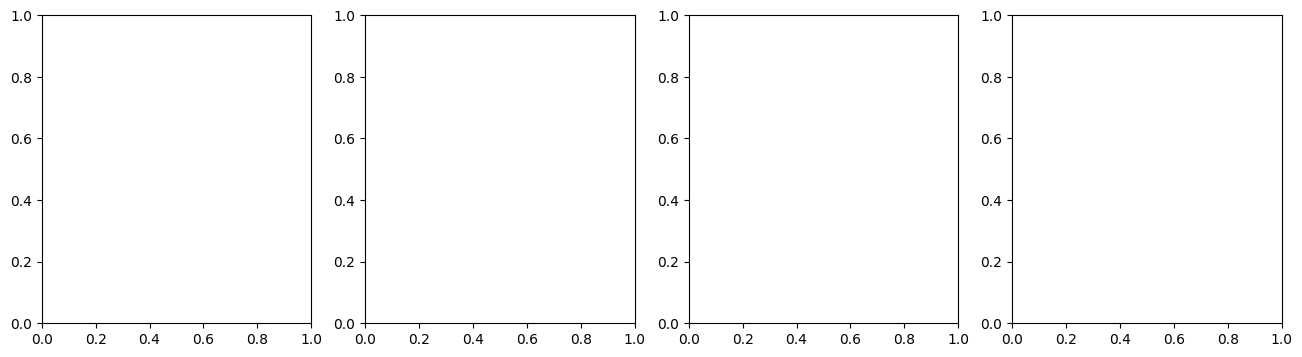

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms or density plots for the predicted values and corresponding non-missing values
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))  # Adjust the number of columns based on the number of features

for i, column in enumerate(training_columns):
    # Plot histogram or density plot for predicted values
    axes[i].hist(predicted_values[:, i], bins=30, alpha=0.5, color='blue', label='Predicted')

    # Plot histogram or density plot for corresponding non-missing values
    axes[i].hist(house_df.loc[~missing_data, column], bins=30, alpha=0.5, color='green', label='Actual')

    # Set plot title and labels
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

    # Add legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# PART 2 Womp Womp